Anonymized Adult Training Dataset
=======================================================

Imports & Warnings:

In [59]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

Loading train dataset:

In [60]:
adult_training_data = pandas.read_csv('Anonymized/anonymized_adult_data02.csv', index_col= False);
display(adult_training_data.head())

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Ethnicity,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,50k
0,"[40, 60[","{Federal-gov, Local-gov, State-gov}",92141,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Widowed}",Adm-clerical,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K
1,"[40, 60[","{Federal-gov, Local-gov, State-gov}",131302,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Widowed}",Adm-clerical,Not-in-family,Black,Female,0.0,0.0,44.0,United-States,<=50K
2,"[40, 60[","{Federal-gov, Local-gov, State-gov}",139161,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Widowed}",Adm-clerical,Not-in-family,Black,Female,0.0,1741.0,40.0,United-States,<=50K
3,"[20, 40[","{Federal-gov, Local-gov, State-gov}",255830,"{Assoc-acdm, Assoc-voc}","[10, 15[",{Never-married},Adm-clerical,Own-child,Black,Female,0.0,0.0,45.0,United-States,<=50K
4,"[20, 40[","{Federal-gov, Local-gov, State-gov}",272986,"{Assoc-acdm, Assoc-voc}","[10, 15[",{Never-married},Adm-clerical,Own-child,Black,Female,0.0,0.0,8.0,United-States,<=50K


## Data Types

The anonymization changed some continuous attributes to categorical. Types need to be checked and transformed again.

In [61]:
CATEGORICAL_ATTRIBUTES= np.array(['Age', 'Workclass', 'Education','Education-number', 'Marital-status', 'Occupation','Relationship','Ethnicity','Sex','Native-country','50k']) 
CONTINUOUS_ATTRIBUTES= np.array(['fnlwgt', 'Capital-gain', 'Capital-loss', 'Hours-per-week']) 
for col in CATEGORICAL_ATTRIBUTES:
   adult_training_data[col]=adult_training_data[col].astype('category')

adult_training_data['fnlwgt']=adult_training_data['fnlwgt'].astype('float64')

In [62]:
display(adult_training_data.dtypes)

Age                 category
Workclass           category
fnlwgt               float64
Education           category
Education-number    category
Marital-status      category
Occupation          category
Relationship        category
Ethnicity           category
Sex                 category
Capital-gain         float64
Capital-loss         float64
Hours-per-week       float64
Native-country      category
50k                 category
dtype: object

### Quantity Anonymized Training Dataset

In [63]:
for attribute,value in adult_training_data.iteritems():
   adult_training_data[attribute]= adult_training_data[attribute].replace('*',np.NAN)


In [64]:
display(adult_training_data.isnull().sum())
seriesObj = adult_training_data.apply(lambda x: x.isnull().any(), axis=1)
nanRows = len(seriesObj[seriesObj == True].index)
rows = adult_training_data.shape[0]
print('Rows in total: ', rows)
print('Number of Rows in dataframe which contain NaN in any column : ', nanRows)
print('% nan :', (nanRows/rows)*100)

Age                 4947
Workclass           4947
fnlwgt                 0
Education           4947
Education-number    4947
Marital-status      4947
Occupation          4947
Relationship        4947
Ethnicity           4947
Sex                 4947
Capital-gain           0
Capital-loss           0
Hours-per-week         0
Native-country         0
50k                    0
dtype: int64

Rows in total:  30162
Number of Rows in dataframe which contain NaN in any column :  4947
% nan : 16.40143226576487


During the anonymization process a supression limt of 20% were configured to eliminate outliers.
16.4% were elimanted and the rows were marked with '\*'. After replacing the character witn numpy.NAN the affected rows will be deleted.

In [65]:
adult_training_data=adult_training_data.dropna()
rows = adult_training_data.shape[0]
print('Rows in total: ', rows)

Rows in total:  25215


## Clustering Categories 


Some categories are put together in the test dataset. This will be done here manually.

In [66]:
#adult_training_data['Education-number']=adult_training_data['Education-number'].map('[1, 17['.format)

In [67]:
adult_training_data['Marital-status']=adult_training_data['Marital-status'].map({'{Married-AF-spouse, Married-civ-spouse}': '{Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Separated}','{Married-spouse-absent, Separated}': '{Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Separated}','{Never-married}':'{Divorced, Windowed, Never-married}','{Divorced, Widowed}':'{Divorced, Windowed, Never-married}'})
adult_training_data['Marital-status']=adult_training_data['Marital-status'].astype('category')

## Anonymized Training Dataset Description

             fnlwgt  Capital-gain  Capital-loss  Hours-per-week
count  2.521500e+04  25215.000000  25215.000000    25215.000000
mean   1.898296e+05   1130.147967     91.054095       41.268055
std    1.054597e+05   7587.383266    408.533135       11.880572
min    1.487800e+04      0.000000      0.000000        1.000000
25%    1.178000e+05      0.000000      0.000000       40.000000
50%    1.788110e+05      0.000000      0.000000       40.000000
75%    2.368610e+05      0.000000      0.000000       45.000000
max    1.484705e+06  99999.000000   3900.000000       99.000000


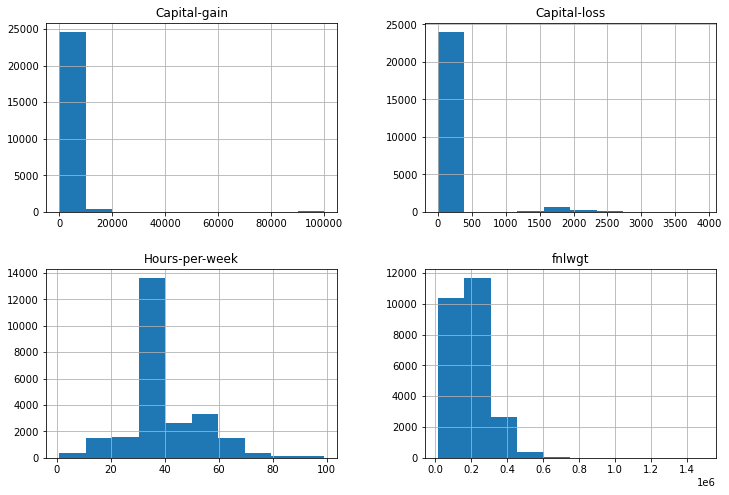

In [68]:
print(adult_training_data.describe());
fig = adult_training_data.hist(column=CONTINUOUS_ATTRIBUTES, figsize=(12,8))

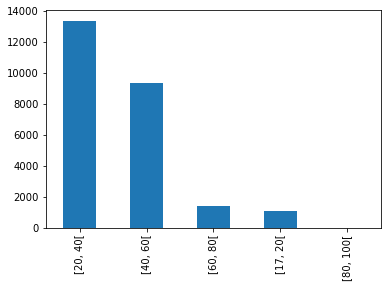

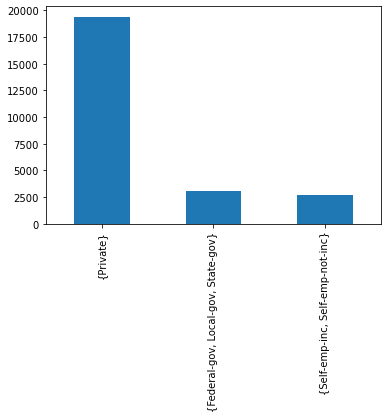

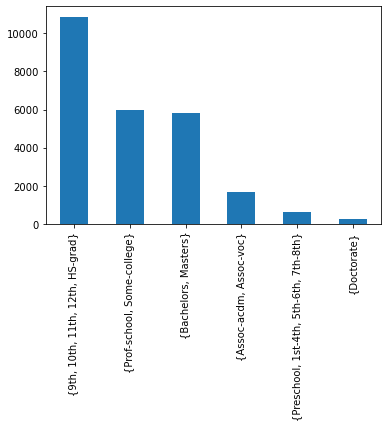

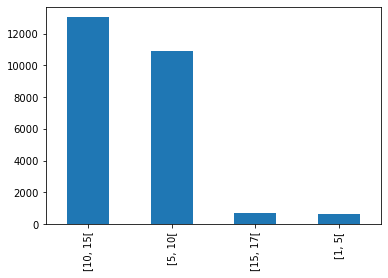

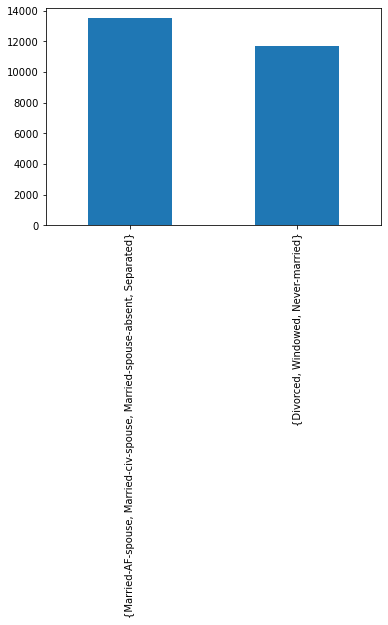

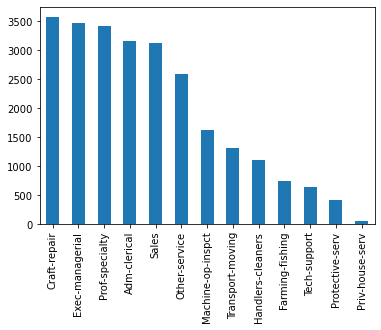

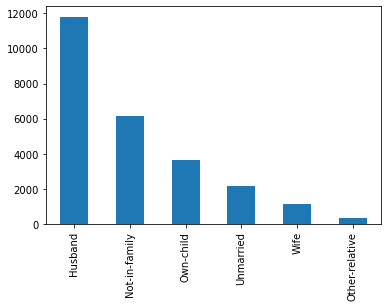

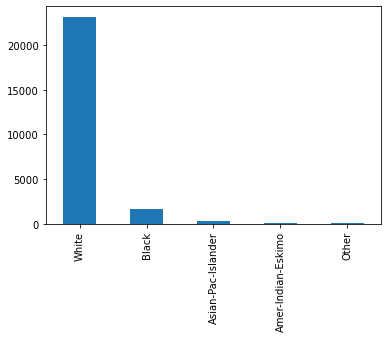

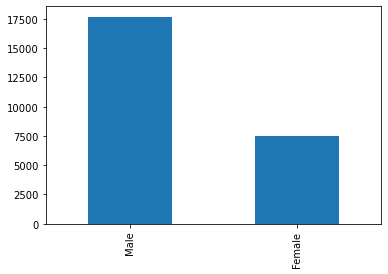

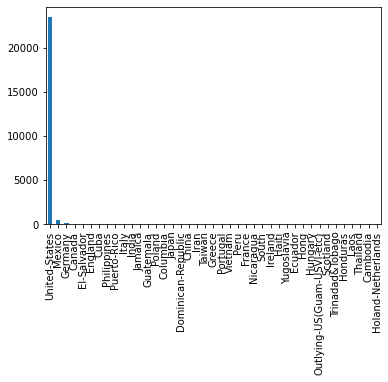

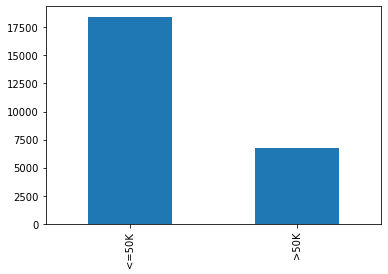

In [69]:
for cat in CATEGORICAL_ATTRIBUTES:
    fig, ax = plt.subplots()
    adult_training_data[cat].value_counts().plot(ax=ax, kind='bar')

## Save to CSV

(un)comment it 

In [70]:
#adult_training_data.to_csv("Anonymized_finished/train03.csv", encoding='utf-8',header=True)